# Project 2: Continuous Control

---

In this notebook, we will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment

## Create the Unity environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/) are installed.

**_Before running the code cell below_**, change the `ENVIRONMENT_PATH` parameter to match the location of the Unity environment that you downloaded.

In [2]:
# ENVIRONMENT_PATH = "../environments/Reacher.app"
ENVIRONMENT_PATH = "../environments/Reacher_Linux/Reacher.x86_64"

In [3]:
SEED = 0
SRC_PATH = "../src"
MODEL_CHECKPOINT_PATH = "../models/drlnd_p2_actor.pth"

In [4]:
sys.path.append(SRC_PATH)

In [5]:
from agents.policy_based import DDPG
from environments import UnityEnvWrapper

In [6]:
env = UnityEnvWrapper(UnityEnvironment(file_name=ENVIRONMENT_PATH))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of our agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

## Training an agent

In [7]:
agent = DDPG(
    state_size=env.state_size, 
    action_size=env.action_size,
    seed=SEED
)

In [8]:
scores = agent.fit(
    environment=env, 
    average_target_score=30,
    actor_checkpoint_path=MODEL_CHECKPOINT_PATH
)

Episode 100	Average Score: 11.59
Episode 152	Average Score: 30.10
Environment solved in 152 episodes!	Average Score: 30.10


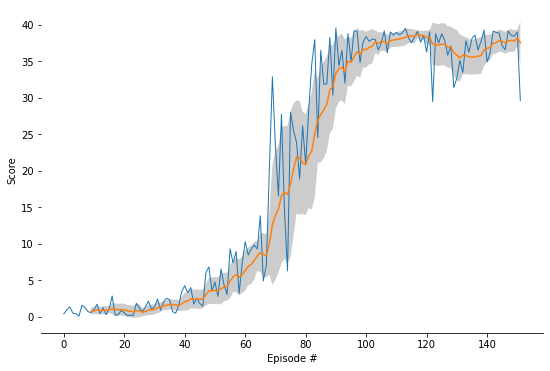

In [27]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["figure.figsize"] = [9, 6]

x = np.arange(len(scores))
mu = pd.Series(scores).rolling(10).mean()
std = pd.Series(scores).rolling(10).std()
plt.plot(x, scores, linewidth=1)
plt.plot(x, mu)
plt.fill_between(x, mu+std, mu-std, facecolor="grey", alpha=0.4)
plt.ylabel("Score")
plt.xlabel("Episode #")

plt.savefig("scores")
plt.show();

## Load model and test a pre-trained agent

In [10]:
agent = DDPG.load(MODEL_CHECKPOINT_PATH)
state = env.reset(train_mode=False)

In [11]:
score = 0
while True:
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    score += reward
    state = next_state
    if done:
        break
    
print(f"Score: {score}")

Score: 39.6699991133064


In [12]:
env.close()